# Código.

In [33]:
# Importamos las librerias y dependencias necesarias.
import pandas as pd
import numpy as np
import spacy
from spacy import displacy
import networkx as nx
import matplotlib.pyplot as plt

#### Los datos están almacenados en un archivo .csv, en donde se especifica cada relación que existe en el grupo que se esta analizando.

In [34]:
 datos = pd.read_csv('cuarto.csv', index_col=None)

In [35]:
datos.head(10)

,source,target
0,Azul,Bere
1,Azul,Carlos
2,Azul,Lesli
3,Yahir,Armando
4,Yahir,Bere
5,Yahir,Carlos
6,Yahir,Oscar
7,Yahir,Said
8,Armando,Yahir
9,Armando,Oscar


In [36]:
relationship_df = pd.DataFrame(datos)

In [37]:
pd.set_option('display.max_rows', None)
relationship_df

,source,target
0,Azul,Bere
1,Azul,Carlos
2,Azul,Lesli
3,Yahir,Armando
4,Yahir,Bere
5,Yahir,Carlos
6,Yahir,Oscar
7,Yahir,Said
8,Armando,Yahir
9,Armando,Oscar


In [38]:
relationship_df = pd.DataFrame(np.sort(relationship_df.values, axis = 1), columns = relationship_df.columns)
relationship_df

,source,target
0,Azul,Bere
1,Azul,Carlos
2,Azul,Lesli
3,Armando,Yahir
4,Bere,Yahir
5,Carlos,Yahir
6,Oscar,Yahir
7,Said,Yahir
8,Armando,Yahir
9,Armando,Oscar


In [39]:
relationship_df["value"] = 1
relationship_df = relationship_df.groupby(["source","target"], sort=False, as_index=False).sum()

In [40]:
relationship_df.head(20)

,source,target,value
0,Azul,Bere,2
1,Azul,Carlos,2
2,Azul,Lesli,2
3,Armando,Yahir,2
4,Bere,Yahir,2
5,Carlos,Yahir,2
6,Oscar,Yahir,2
7,Said,Yahir,1
8,Armando,Oscar,2
9,Armando,Carlos,1


# Red social (Grafo)

In [41]:
# Create a graph from a pandas dataframe
G = nx.from_pandas_edgelist(relationship_df, 
                            source = "source", 
                            target = "target", 
                            edge_attr = "value", 
                            create_using = nx.Graph())

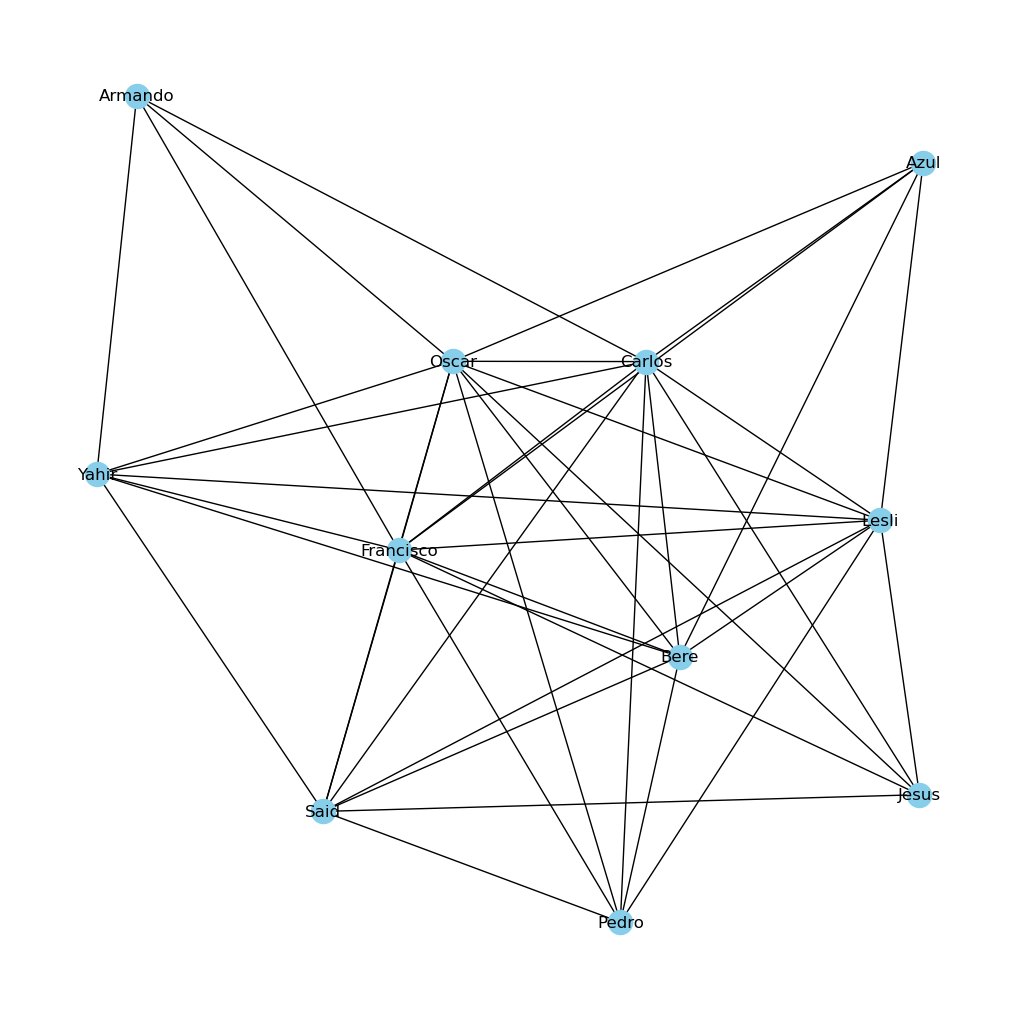

In [42]:
plt.figure(figsize=(10,10))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

In [43]:
from pyvis.network import Network
net = Network(notebook = True, width="1366px", height="768px", bgcolor='#222222', font_color='white')

node_degree = dict(G.degree)

#Setting up node size attribute
nx.set_node_attributes(G, node_degree, 'size')

net.from_nx(G)
net.show("r4.html")


r4.html


# Visualizar comunidades dentro de la red

In [44]:
# Importamos librerias necesarias para mostrar la comunidades en una red
import community as community_louvain
import community.community_louvain as community_louvain

In [45]:
communities = community_louvain.best_partition(G)

In [46]:
communities

{'Azul': 0,
 'Bere': 0,
 'Carlos': 1,
 'Lesli': 1,
 'Armando': 0,
 'Yahir': 0,
 'Oscar': 0,
 'Said': 1,
 'Francisco': 0,
 'Pedro': 1,
 'Jesus': 1}

In [47]:
nx.set_node_attributes(G, communities, 'group')

In [48]:
com_net = Network(notebook = True, width="1366px", height="768px", bgcolor='#222222', font_color='white')
com_net.from_nx(G)
com_net.show("r4_communities.html")

r4_communities.html
